# Exploring Datasets with Python

In this short demo we will analyse a given dataset from 1978, which contains information about politicians having affairs. 



To work with common files like CSV, JSON, Excel files etc., we will use [Pandas](http://pandas.pydata.org/)

In [ ]:
import pandas as pd

Our dataset is given as a CSV file. Pandas provides an easy way to read our file with `read_csv`. 

In [ ]:
df = pd.read_csv('/content/WHO-COVID-19-global-data.csv')

 We can use `info()` to get the number of entries of each column.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233682 entries, 0 to 233681
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      233682 non-null  object
 1   Country_code       232696 non-null  object
 2   Country            233682 non-null  object
 3   WHO_region         233682 non-null  object
 4   New_cases          233682 non-null  int64 
 5   Cumulative_cases   233682 non-null  int64 
 6   New_deaths         233682 non-null  int64 
 7   Cumulative_deaths  233682 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 14.3+ MB




See by using `head()`, which will print the first 5 rows.

In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [ ]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
233677,2022-09-10,ZW,Zimbabwe,AFRO,25,256859,0,5596
233678,2022-09-11,ZW,Zimbabwe,AFRO,11,256870,0,5596
233679,2022-09-12,ZW,Zimbabwe,AFRO,18,256888,0,5596
233680,2022-09-13,ZW,Zimbabwe,AFRO,0,256888,0,5596
233681,2022-09-14,ZW,Zimbabwe,AFRO,51,256939,0,5596


We can access a column of our dataset by using bracket notation and the name of the column.

In [ ]:
df['Country']

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
233677       Zimbabwe
233678       Zimbabwe
233679       Zimbabwe
233680       Zimbabwe
233681       Zimbabwe
Name: Country, Length: 233682, dtype: object

For categorical features like `sex`, we can also get the distributions of each value by using `value_counts()`.

In [ ]:
df['Country_code'].value_counts()

AF    986
PY    986
NG    986
NU    986
MK    986
     ... 
GL    986
GD    986
GP    986
GU    986
ZW    986
Name: Country_code, Length: 236, dtype: int64

It definitly makes no sense to count each distinct value. Therefore, we can use `describe()`.

In [ ]:
df['New_cases'].describe()

count    2.336820e+05
mean     2.597906e+03
std      1.648670e+04
min     -3.295200e+04
25%      0.000000e+00
50%      2.100000e+01
75%      4.840000e+02
max      1.256012e+06
Name: New_cases, dtype: float64

We can also access values like `mean` or `max` directly with the corrsponding methods. 

In [ ]:
df['New_cases'].max()

1256012

This works for the whole dataframe as well. 

In [ ]:
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date_reported                                               2022-09-14
Country              occupied Palestinian territory, including east...
WHO_region                                                        WPRO
New_cases                                                      1256012
Cumulative_cases                                              94076111
New_deaths                                                       11447
Cumulative_deaths                                              1039882
dtype: object

There is also an easy way to filter your dataset. Let's say we want to have a subset of our data containing only woman. This is also possible with the bracket notation!

In [ ]:
df1 = df[df['Country'] == 'Afghanistan'] 

In [ ]:
df1.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


The above statement returns a new dataframe (not a copy, modifying this data will modify the original as well), which can be accessed like before.The numerical distribution is for our females.

In [ ]:
df1.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,986.000000,986.000000,986.000000,986.000000
mean,199.192698,95134.733266,7.901623,4097.643002
std,350.041656,68583.312776,16.613598,3082.269721
min,-1.000000,0.000000,0.000000,0.000000
25%,25.000000,38413.500000,0.000000,1413.750000
50%,70.000000,61952.500000,2.000000,2692.000000
75%,210.000000,158390.750000,7.000000,7373.000000
max,3243.000000,196404.000000,159.000000,7791.000000


We can also create new rows. Specify the new column name in brackets and provide a function to set the data. We will create a new column containing True or False, wheather or not the person is below 30.

In [ ]:
import numpy as np

In [ ]:
df['Warning'] = np.where(df['New_cases']>= 10000, True, False)

In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Warning
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,False
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,False
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,False
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,False
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,False


We can use this to normalize our columns with better values. Take for example `religious`. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.

In [ ]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']

## Visualize Data

To visualize our data, we will use [Seaborn](https://seaborn.pydata.org), a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

In [ ]:
import seaborn as sns

To see our charts directly in our notebook, we have to execute the following:

In [ ]:
%matplotlib inline
sns.set()
sns.set_context('talk')

Seaborn together with Pandas makes it pretty easy to create charts to analyze our data. We can pass our Dataframes and Series directly into Seaborn methods. 

### Univariate Plotting

Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called `distplot` by passing our series of ages as argument.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


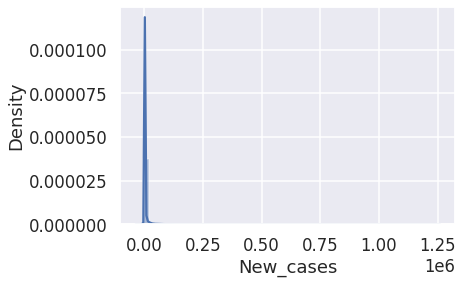

In [ ]:
sns.distplot(df['New_cases'])

The chart above calculates a kernel density as well. To get a real histogram, we have to disable the `kde` feature. We can also increase to number of buckets for our histogram by setting `bins` to 50.

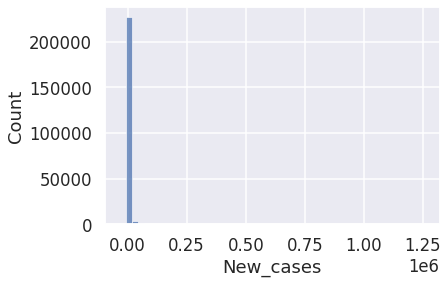

In [ ]:
sns.histplot(data = df['New_cases'], kde = False, bins = 50 )

The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

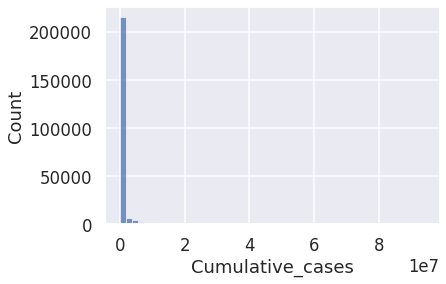

In [ ]:
sns.histplot(data = df['Cumulative_cases'], kde = False, bins = 50 )

The average age of our people is around 32, but the most people are married for more than 14 years!

### Bivariate Plotting

Numbers get even more interesting when we can compare them to other numbers! Lets start comparing the number of years married vs the number of affairs. Seaborn provides us with a method called `jointplot` for this use case.

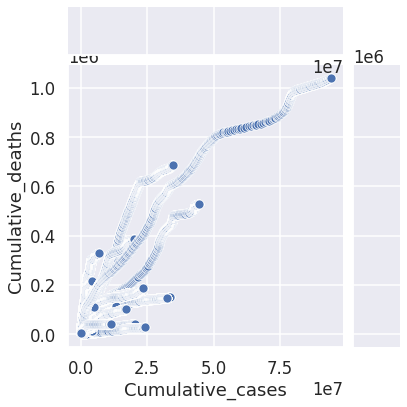

In [ ]:
sns.jointplot(x = "Cumulative_cases", y = "Cumulative_deaths", kind = "scatter", data = df)

To get a better feeling of how the number of affairs is affected by the number of years married, we can use a regression model by specifying `kind` as `reg`.

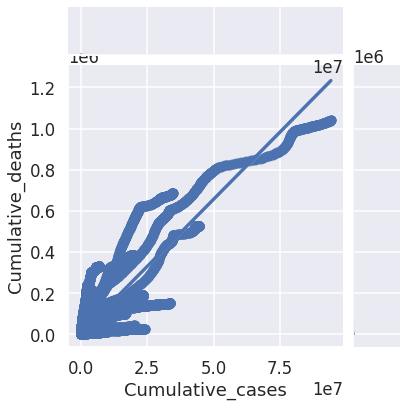

In [ ]:
sns.jointplot(x = "Cumulative_cases", y = "Cumulative_deaths", kind = "reg", data = df)

We can also use a kernel to kompare the density of two columns against each other, e.g. `age` and `ym`.

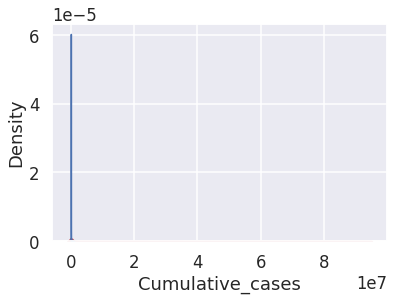

In [ ]:
import matplotlib.pyplot as plt
fig = sns.kdeplot(df['Cumulative_cases'], shade=True, color="r")
fig = sns.kdeplot(df['Cumulative_deaths'], shade=True, color="b")
plt.show()


We can get an even better comparison by plotting everything vs everything! Seaborn provides this with the `pairplot` method.

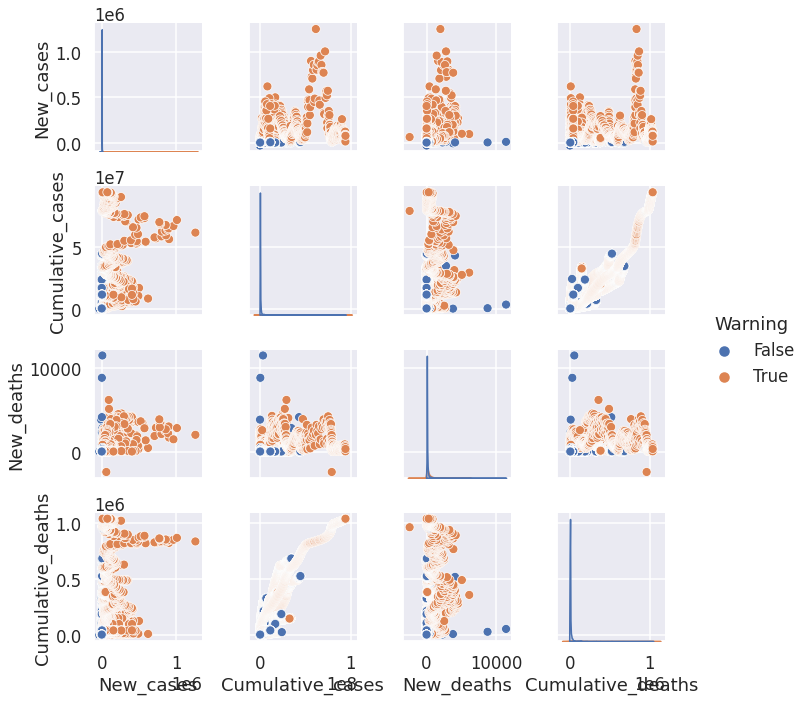

In [ ]:
sns.pairplot(df, hue ='Warning')

To get even better separation, we can use `lmplot` to compare just the fields we need.

Let's say we're interested in the number of affairs vs years married. We also whant to separate them by `sex`, `child` and `religious`. We will use `sns.lmplot(x="ym", y="nbaffairs", hue="sex", col="child", row="religious", data=affairs)` to achieve this.

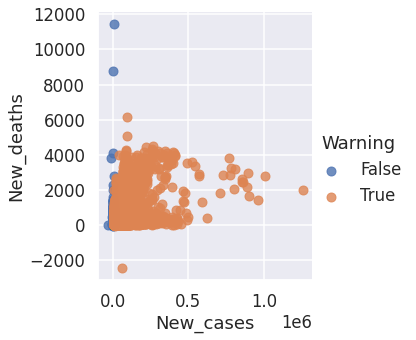

In [ ]:
sns.lmplot(x ='New_cases', y ='New_deaths', fit_reg = False, hue = 'Warning', data = df)

We can also get the correlations between the values by using Pandas builtin method `corr()`.

In [ ]:
df.corr(method ='pearson')

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Warning
New_cases,1.000000,0.523550,0.554163,0.467005,0.555491
Cumulative_cases,0.523550,1.000000,0.414315,0.897454,0.497047
New_deaths,0.554163,0.414315,1.000000,0.506505,0.495167
Cumulative_deaths,0.467005,0.897454,0.506505,1.000000,0.487619
Warning,0.555491,0.497047,0.495167,0.487619,1.000000


Feed these stats into Seaborns `heatmap` method will provide us with the visual representation.

In [ ]:
df2 =df[['New_cases','New_deaths']] 

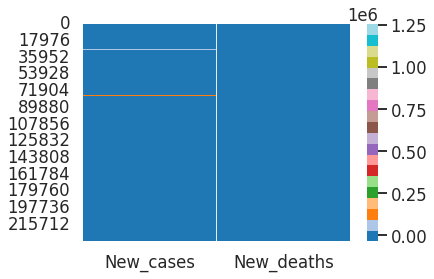

In [ ]:
import matplotlib.pyplot as plt
cmap = "tab20"
hm = sns.heatmap(data=df2,cmap=cmap)
plt.show()

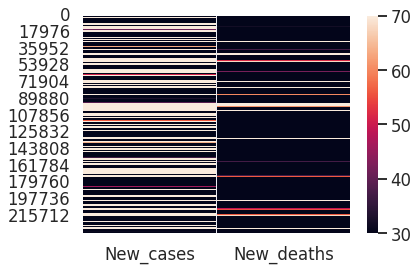

In [ ]:
vmin = 30
vmax = 70
hm = sns.heatmap(data=df2, vmin=vmin, vmax=vmax)
plt.show()